In [ ]:
!nvidia-smi

Fri Jan 20 11:37:03 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P0    28W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive, data_table

data_table.enable_dataframe_formatter()
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
import cv2
import torch
import numpy as np
import pandas as pd
from tqdm import tqdm
from os import listdir
from os.path import isfile, join
from matplotlib import pyplot as plt

In [ ]:
path = '/content/gdrive/MyDrive/yolov5/data/images'
len([f for f in listdir(path) if isfile(join(path, f))])

KeyboardInterrupt: ignored

In [ ]:
!pip install -qr /content/gdrive/MyDrive/yolov5/yolov5/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 66.5 MB/s eta 0:00:00


In [ ]:
train = pd.read_csv('/content/gdrive/MyDrive/data_science/Computer_Vision/data/dataset/train.csv')
train.head()

In [ ]:
train[['xmax', 'xmin', 'ymax', 'ymin']] = train[['xmax', 'xmin', 'ymax', 'ymin']] * 2
train[['xmax', 'xmin']] = train[['xmax', 'xmin']].clip(0, 1920)
train[['ymax', 'ymin']] = train[['ymax', 'ymin']].clip(0, 1080)

train.head()

In [ ]:
reslution = (1920, 1080)
images_path = '/content/gdrive/MyDrive/data_science/Computer_Vision/data/dataset/images'
labels_path = '/content/gdrive/MyDrive/data_science/Computer_Vision/data/dataset/labels'
test_path = '/content/gdrive/MyDrive/data_science/Computer_Vision/data/dataset/test'
files = [f for f in os.listdir(images_path) if os.path.isfile(os.path.join(images_path, f))]
files = [f[:-4] for f in files]

In [ ]:
for file in tqdm(files):
    temp = train[train.image_path == f'{file}.jpg']
    if temp.empty:
        image_path = os.path.join(images_path, f'{file}.jpg')
        new_path = os.path.join(test_path, f'{file}.jpg')
        os.rename(image_path, new_path)
        continue
    label_path = os.path.join(labels_path, f"{file}.txt")

    with open(label_path, "w") as label_file:
        for l in temp.iterrows():
            x_center = (l[1].xmax + l[1].xmin) / (2 * reslution[0])
            y_center = (l[1].ymax + l[1].ymin) / (2 * reslution[1])
            width = (l[1].xmax - l[1].xmin) / reslution[0]
            height = (l[1].ymax - l[1].ymin) / reslution[1]
            label_file.write(f"{int(l[1]['class'])} {x_center} {y_center} {width} {height}\n")

In [ ]:
!cd /content/gdrive/MyDrive/yolov5/yolov5 && python train.py --img 640 --batch 16 --epochs 50 --data dataset.yaml --weights /content/gdrive/MyDrive/yolov5/yolov5/runs/train/exp15/weights/best.pt --cache ram --name 'last_exp'


train: weights=/content/gdrive/MyDrive/yolov5/yolov5/runs/train/exp15/weights/best.pt, cfg=, data=dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=last_exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
Command 'git fetch origin' timed out after 5 seconds
YOLOv5 🚀 v7.0-70-g589edc7 Python-3.8.10 torch-1.13.1+cu116 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=

In [ ]:
!cd /content/gdrive/MyDrive/data_science/Computer_Vision/yolov5 && python detect.py --weights /content/gdrive/MyDrive/data_science/Computer_Vision/yolov5/runs/train/exp4/weights/best.pt --source /content/gdrive/MyDrive/data_science/Computer_Vision/kimo1.mp4

In [ ]:
import shutil
images_src_path = '/content/gdrive/MyDrive/yolov5/data/images'
labels_src_path = '/content/gdrive/MyDrive/yolov5/data/labels'

images_dst_path = '/content/gdrive/MyDrive/data_science/Computer_Vision/data/dataset/train/images'
labels_dst_path = '/content/gdrive/MyDrive/data_science/Computer_Vision/data/dataset/train/labels'

images = [f[:-4] for f in listdir(images_src_path) if isfile(join(images_src_path, f))]
for image in tqdm(images):
    src = join(images_src_path, f'{image}.jpg')
    dst = join(images_dst_path, f'{image}.jpg')
    shutil.copy2(src, dst)
    src = join(labels_src_path, f'{image}.txt')
    dst = join(labels_dst_path, f'{image}.txt')
    shutil.copy2(src, dst)

 67%|██████▋   | 110/163 [00:02<00:01, 49.29it/s]


FileNotFoundError: ignored

In [ ]:
len([f[:-4] for f in listdir(images_dst_path) if isfile(join(images_dst_path, f))])


15160

YOLOv8

In [ ]:
!pip install ultralytics

In [ ]:
import os
import cv2
import torch
import numpy as np
import pandas as pd
from tqdm import tqdm
from matplotlib import pyplot as plt
from ultralytics import YOLO
from IPython.display import Image

In [ ]:
!yolo task=detect mode=train model=yolov8x.pt optimizer=Adam batch=16 epochs=5 data=/content/gdrive/MyDrive/data_science/Computer_Vision/data/dataset

In [ ]:
images_path = '/content/gdrive/MyDrive/data_science/Computer_Vision/data/dataset/test'
images = ['230009c117aab6fb0fd03d35820d5051.jpg',
    '360bb15954a8bf1c73e870a7d5551cf8.jpg',
    '27f2dc901ae332e218b3ed943fbff601.jpg',
    'd2bf2c6be9f824a62d7c28287c377d1d.jpg',
    'e39f1a48e9f8c143acdf36ae3b47659e.jpg',
    '92fc627ff1922afa90ec8ca04fb0e170.jpg',
    '6f709afaea963c65e7a83e407cd7fac8.jpg',
    '983acc70bf2f0293a458197484c9be17.jpg',
    'e1f9180591ad315c19f85ef683a9dca4.jpg',
    '1b1db3deb85030f2bfc6925a9dd3eee7.jpg',
    '5fd490035bc58eeab0a7b732fdf76bfd.jpg',
    '2772690816ecbad849ca465d3f045977.jpg',
    'e806d40c5add8017740579ed7262aa2b.jpg',
    '8be32e879f3e2370fc52a2b0e72c74cc.jpg',
    'd91a8610508fdf9434bfed1b68299b9b.jpg',
    'aef49b49b04c27e66c513ca26f596253.jpg',
    'db49453ba9d0583957d00fc45d0e2698.jpg',
    'cbc2a4b62c01e708c0224e393dfc6223.jpg',
    '46627c685bb829f53679987362f975be.jpg',
    'e417727e8dfd3d0b0e049833ad3ee669.jpg',
    'bd698f3f0f4b3944d47cdca298f7d46b.jpg',
    '5bd8503e41ba7ee0a4812507788e51ed.jpg',
    '2a9aa56b8d7db093a0f97da81940b4bf.jpg',
    '5b67d902cb0fb98e190aae3e75d7cbb6.jpg',
    '38e2b48ada92834f00b4e40913521702.jpg',
    '534a2bfb5597b75f64b097d3a2d8a9f4.jpg',
    '76731d3a8bad80d0dd5457e18c507da1.jpg',
    '94b0f5d3709f611d1927a691f4a09e0a.jpg',
    '8d421dd597e5ed80ee0ebf62a93da658.jpg',
    'aea3448c3c4ef8addd6d73861cc70adb.jpg',
    'b278142e994a544267302fc61cfcfe73.jpg',
    'b4c2387b97f8fbd32a10dd6da9b0d184.jpg',
    'dff823faa3c5d538695fcf6f9e5d09eb.jpg',
    'c8567e24bd5c0a9734ce69b6c8ce66ad.jpg',
    '0227544122e5836bbeeef642241a81c2.jpg',
    'b3684b58ebadf8ba0fb7f4aa76357e6c.jpg',
    'fa13a3a6a7c218664b3692c5b7f05d48.jpg',
    '4ce1919c0279714e2c7fb14fe040d374.jpg',
    '3d9ae21e377fc158cbca5abe315bd531.jpg',
    '1b1f9b26b286e207e1cd783b1b5cf8f1.jpg',
    '864047ee4acf2a0549b1ea6ac59ca950.jpg',
    '13ffd30b95a01f54b9e9919126a2c5dd.jpg',
    'f3c187d799742aba7021b255aacda1a2.jpg',
    'a5955c9be1f20e411d7723bcb5b7e5f0.jpg',
    'ed8848c4ce41d9ba70d6d1ab364094ed.jpg',
    'f17ee71fa10ef7569d16fadfab95653b.jpg',
    '8f53092ef5efae8beeb1a28ff2da2384.jpg',
    'bd3546279976f5cdaf14373f038c66cd.jpg',
    '240725a5a4bf80bc812ae91fed359a62.jpg',
    '8aa9b7f07715e15490f5466c6d36e53b.jpg',
    '0c002beffd10374f52471b54aa569295.jpg',
    '1e3d69a589547061d343592cd3e9a36f.jpg',
    '2f6dda045ce480187fb9c70be884b0fc.jpg',
    '94bf40c9c194853f01ec61ba2df18c5a.jpg',
    'ba9239de1765a856152c50f79504f9dd.jpg',
    'e40a5dfb962bda7382eddfd929562e28.jpg',
    'd3c4b6fe89764d05bbf94a856d550576.jpg',
    '95c1f10606658a7586d509e90819bcf2.jpg',
    '46b2f729cc6f9d1a5573b359e4ccd407.jpg',
    '7a4a9ff886cf5e0db14454ddb6a74570.jpg',
    '42735eb9b207886a4cade197d87a84fe.jpg',
    '19c99add80dffee3e84d4a0fd47f2c7e.jpg',
    'b0569eb85b4755a166f6e6da16c78fca.jpg',
    'cc60254be509d94718d053c4550506c1.jpg',
    'b95a929ffe6676119acd8eca77ac446e.jpg',
    'd07b063a0f6e9e0c11b75e67875fe1fd.jpg',
    'a0dfbebe02500fa510081844a14af848.jpg',
    'e67434e503baadb968f51f3244b7a8dd.jpg',
    'e05ced9a08868bf400d7a6851e1184ea.jpg',
    '81378866af0fa1df73eba401bb0b1a5c.jpg',
    'acff21d1ce5c22091894fbb7bb048793.jpg',
    'ae59f797a2f56a00d6242672829ca12f.jpg',
    'b4acfbaf2d7f13d91f7c34734829f8f6.jpg',
    'bac554f9a779f419d008695b6327393d.jpg',
    'e7e51ae22fa6f1bfd1f14f9797876700.jpg',
    '8ee3d9ae87f18e737fbab5c356f424ef.jpg',
    '5898934f6e671fc76d8e02497f132a1d.jpg',
    'ad73024702a86ceac35ae439097fd6ac.jpg',
    'edbcbf3baf7305d9b5638053c2f60623.jpg',
    'dfc1eb20c5250a668c482ad92eadd978.jpg',
    '0b9e328782e05c2f65d81ddd006d7216.jpg',
    'b3615a5e86aea88482738916323055bb.jpg',
    '7d06df36ce2ad637eb09ca6684190550.jpg',
    '295663526a9375ea2064b8cf69a3704b.jpg',
    '73749d583f94c3594f4b104ec409aad2.jpg',
    '8963f06222cf749e434d0d873cd01470.jpg',
    'e47f7540098409d35e470705bf46ca4d.jpg',
    '24821cc22ee2b31182b190b9c8208d93.jpg',
    'ba91a0c500ebdcceefc38483c99f67a1.jpg',
    '9fbfd6498100151a79aedcdf7ecfc208.jpg',
    'ebeb00de0d36e92e5f296f6743c302eb.jpg',
    '9a183320d438e6df6756b9a6e52a231c.jpg',
    'c2160d27812c651f4604b622353fd068.jpg',
    'd71f903888b6fd014448cc1790305a30.jpg',
    '3033d3c21d896f661dade74d567ec4f1.jpg',
    '036c656e46e541468e016e6430be74e5.jpg',
    'a7a3b87b78fc39970376106e53db897f.jpg',
    'e895a87a394612fc092f1cc1de08e415.jpg',
    '821b35c7247a292e4e6977d125d8677e.jpg',
    'a966cfe7c38d95f2b2b7dd50c584b48b.jpg',
    'ead293dd9b165be9313218dc4f7b37ed.jpg',
    '2d1f753074f8b0378718e62382baa68d.jpg',
    'a8fb82043adc0d99b441e5233bbc7542.jpg',
    '5646e9106bd4cb9a4c91a472c90489b4.jpg',
    '012b49cf858552511458c440199ed082.jpg',
    'b123fed838faf0a8f5edcf468ae52e10.jpg',
    'e6acfca0821bc396b99948b4f72a64e2.jpg',
    '33bca5c8aa715aab57c6d7ddc721ca99.jpg',
    '87ff1f59040b92b9c3ae114c74ad74cb.jpg',
    'c7d7d031b5086f5c91833b6efa277d71.jpg',
    '33324b7e81629a6be7135f050761d512.jpg',
    'dcd8114acddf64512fc232cf6225a215.jpg',
    '74de48e9f0c8d24ac47ddf4e1c115ffc.jpg']

In [ ]:
len(images)

113

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/gdrive/MyDrive/yolov5/yolov5/runs/train/exp15/weights/best.pt', force_reload=True)

/usr/local/lib/python3.8/dist-packages/torch/hub.py:267: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-1-20 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 322 layers, 86240704 parameters, 0 gradients, 204.0 GFLOPs
Adding AutoShape... 


In [ ]:
results.print()

image 1/1: 1080x1920 22 GARBAGEs
Speed: 38.0ms pre-process, 2209.8ms inference, 0.7ms NMS per image at shape (1, 3, 384, 640)


In [ ]:
images[0]

'3450cbeb3320d5e4f52a4c226fb37b03.jpg'

In [ ]:
submission

,xmin,ymin,xmax,ymax,confidence,class,name,image_path
0,0.274913,0.415311,0.285598,0.444687,0.763418,3,GARBAGE,230009c117aab6fb0fd03d35820d5051.jpg
1,0.799472,0.770284,0.821252,0.821184,0.731477,3,GARBAGE,230009c117aab6fb0fd03d35820d5051.jpg
2,0.744101,0.757363,0.762855,0.807741,0.713160,3,GARBAGE,230009c117aab6fb0fd03d35820d5051.jpg
3,0.693291,0.758521,0.711021,0.802091,0.705037,3,GARBAGE,230009c117aab6fb0fd03d35820d5051.jpg
4,0.523129,0.654978,0.565353,0.702876,0.580912,3,GARBAGE,230009c117aab6fb0fd03d35820d5051.jpg
...,...,...,...,...,...,...,...,...
0,0.078070,0.053954,0.121514,0.197230,0.864802,7,BAD_BILLBOARD,fa13a3a6a7c218664b3692c5b7f05d48.jpg
0,0.918961,0.304326,1.000000,0.438734,0.858737,10,UNKEPT_FACADE,4ce1919c0279714e2c7fb14fe040d374.jpg
1,0.754469,0.867625,0.769669,0.906757,0.533956,3,GARBAGE,4ce1919c0279714e2c7fb14fe040d374.jpg
2,0.812324,0.889390,0.870574,0.943801,0.289222,3,GARBAGE,4ce1919c0279714e2c7fb14fe040d374.jpg


In [ ]:
images[38]

'18GPG1N7N6RR3bMiaDEneMzWPXKFBECqxq.jpg'

In [ ]:
submission = pd.DataFrame()

for image in tqdm(images):
    results = model(join(images_path, image))
    temp = results.pandas().xyxyn[0]
    temp['image_path'] = image
    submission = pd.concat([submission, temp], axis=0)

100%|██████████| 113/113 [00:42<00:00,  2.64it/s]


In [ ]:
submission.to_csv('submission2.csv')

In [ ]:
temp = submission['image_path'].unique()
lost_images = [f for f in images if f not in temp]

lost_images

['230009c117aab6fb0fd03d35820d5051.jpg',
 '360bb15954a8bf1c73e870a7d5551cf8.jpg',
 '27f2dc901ae332e218b3ed943fbff601.jpg',
 'd2bf2c6be9f824a62d7c28287c377d1d.jpg',
 'e39f1a48e9f8c143acdf36ae3b47659e.jpg',
 '92fc627ff1922afa90ec8ca04fb0e170.jpg',
 '6f709afaea963c65e7a83e407cd7fac8.jpg',
 '983acc70bf2f0293a458197484c9be17.jpg',
 'e1f9180591ad315c19f85ef683a9dca4.jpg',
 '1b1db3deb85030f2bfc6925a9dd3eee7.jpg',
 '5fd490035bc58eeab0a7b732fdf76bfd.jpg',
 '2772690816ecbad849ca465d3f045977.jpg',
 'e806d40c5add8017740579ed7262aa2b.jpg',
 '8be32e879f3e2370fc52a2b0e72c74cc.jpg',
 'd91a8610508fdf9434bfed1b68299b9b.jpg',
 'aef49b49b04c27e66c513ca26f596253.jpg',
 'db49453ba9d0583957d00fc45d0e2698.jpg',
 'cbc2a4b62c01e708c0224e393dfc6223.jpg',
 '46627c685bb829f53679987362f975be.jpg',
 'e417727e8dfd3d0b0e049833ad3ee669.jpg',
 'bd698f3f0f4b3944d47cdca298f7d46b.jpg',
 '5bd8503e41ba7ee0a4812507788e51ed.jpg',
 '2a9aa56b8d7db093a0f97da81940b4bf.jpg',
 '5b67d902cb0fb98e190aae3e75d7cbb6.jpg',
 '38e2b48ada9283

In [ ]:
img = images[20]
results = model(join(images_path, img))
results.print()

image 1/1: 1080x1920 1 POTHOLES, 2 GARBAGEs
Speed: 79.9ms pre-process, 61.9ms inference, 4.8ms NMS per image at shape (1, 3, 384, 640)


In [ ]:
img

'bd698f3f0f4b3944d47cdca298f7d46b.jpg'

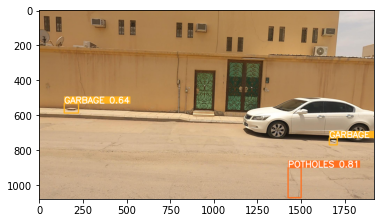

In [ ]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()